In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform
%matplotlib inline
from inference_model import InferenceModel
from ipywidgets import interact, IntSlider

In [2]:
from sir_model import ProximityModel
model = ProximityModel(N=200, scale=1.2, mu=0.01, lamb=0.02)
print("expected number of contacts %.1f" % model.n_contacts)

expected number of contacts 6.7


In [3]:
model.run(500, print_every=100)

Generating transmissions
Running simulation
t = 0 / 500
t = 100 / 500
t = 200 / 500
t = 300 / 500
t = 400 / 500


/Users/zhengxinyong/Desktop/COVID19/sir_inference/sir_model.py:90: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


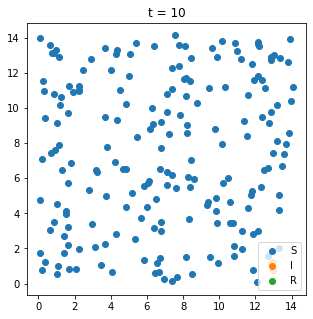

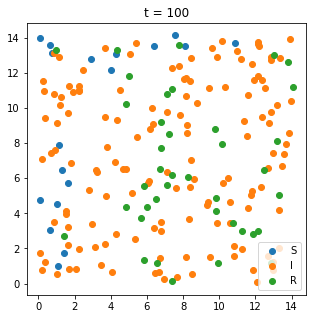

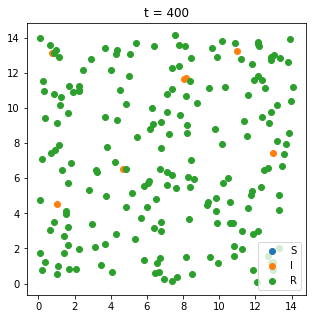

In [4]:
model.plot(t=10)
model.plot(t=100)
model.plot(t=400)

# Inference


freqs =  [0.985, 0.015, 0.0]
t = 0 / 495
t = 20 / 495
t = 40 / 495
t = 60 / 495
t = 80 / 495
t = 100 / 495
t = 120 / 495
t = 140 / 495
t = 160 / 495
t = 180 / 495
t = 200 / 495
t = 220 / 495
t = 240 / 495
t = 260 / 495
t = 280 / 495
t = 300 / 495
t = 320 / 495
t = 340 / 495
t = 360 / 495
t = 380 / 495
t = 400 / 495
t = 420 / 495
t = 440 / 495
t = 460 / 495
t = 480 / 495


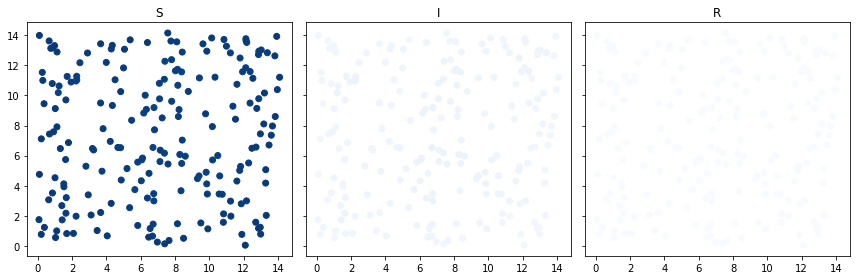

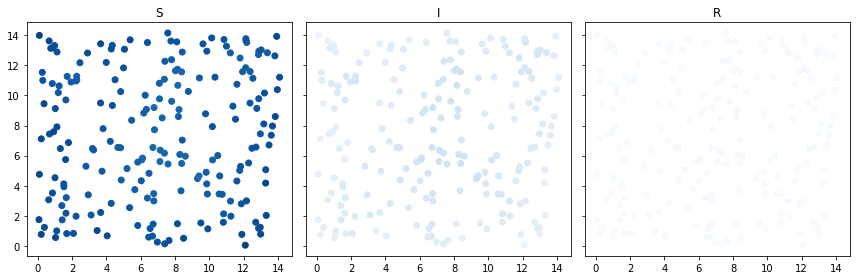

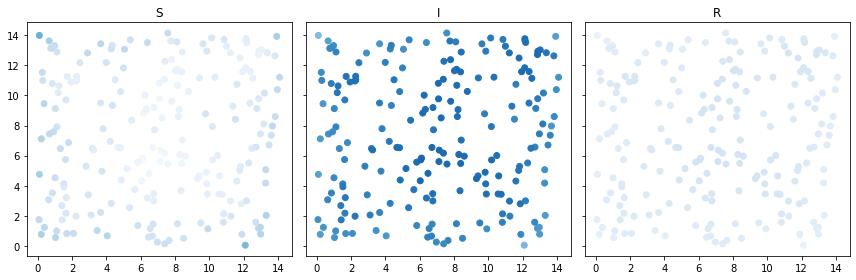

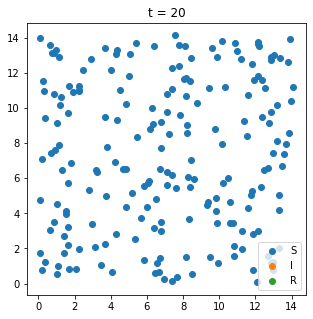

In [5]:
import numpy as np
from inference_model import InferenceModel
def generate_initial_probas(M, states):
    freqs = [np.mean(states==s) for s in [0,1,2]]
    print("freqs = ", freqs)
    N = len(states)
    initial_probas = np.broadcast_to(freqs, (N, 3)).copy()
    observations = np.random.choice(N, M, replace=False)
    for i in observations:
        s = int(states[i])
        initial_probas[i] = np.zeros(3)
        initial_probas[i, s] = 1.
    return initial_probas

# we observe M=20 persons at time t_obs=5
t_obs = 5
initial_probas = generate_initial_probas(M=5, states=model.states[t_obs])
infer = InferenceModel(initial_probas, model.x_pos, model.y_pos)
infer.time_evolution(model.recover_probas, model.transmissions[t_obs:], print_every=20)
infer.plot_probas(10)
infer.plot_probas(20)
infer.plot_probas(50)
infer.plot_states(20)

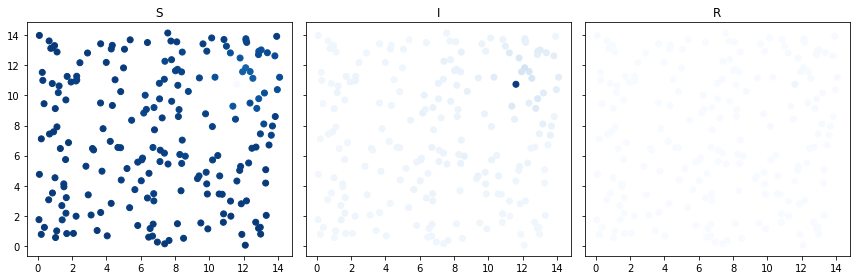

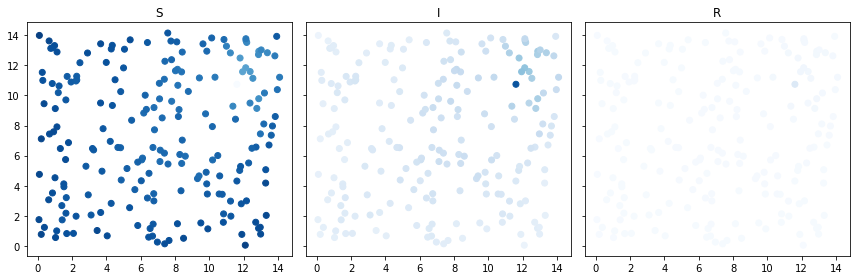

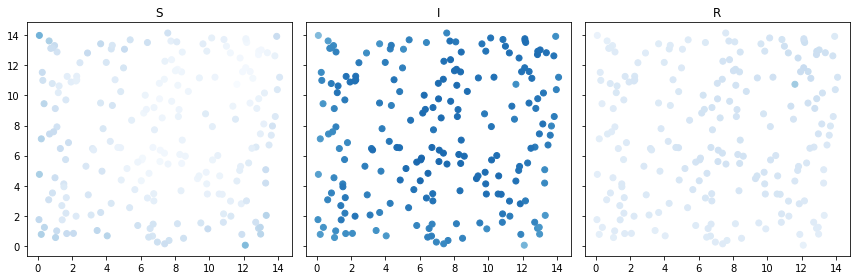

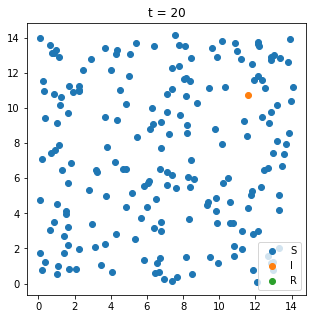

In [6]:
infer.update_individual(0, 1, 10 - t_obs, 10 - t_obs, model.recover_probas, model.transmissions[t_obs:])
infer.plot_probas(10)
infer.plot_probas(20)
infer.plot_probas(50)
infer.plot_states(20)